# Introduction

Ce notebook illustre l'effet du changement du poids attribué à la classe "Noise" dans une classification binaire "FR" versus "Noise" par un convolutional neural network.

Example: 
```
class_weight = {0:1.0, 1:5.0}

history = model.fit(
    data.x_train, data.y_train, 
    epochs=epochs,
    class_weight=class_weight#callbacks
)
```

In this case, every instance of **class 1 (Noise)** will be treated as 5 instances of **class 0 (FR)**.

# 1. Fast Ripples

In [8]:
### Base model

import pandas as pd
import numpy as np

path_list = []

path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1base_detection_summary_20022023_12-57-46.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1_detection_summary_20022023_15-25-00.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-2_detection_summary_20022023_15-02-13.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-5_detection_summary_20022023_11-28-06.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-10_detection_summary_20022023_11-45-32.xlsx")
                 
step1_db0 = []
step1_db5 = []
step1_db10 = []
step1_db15 = []

for path in path_list:       
 
    print("")
    print(path)
    df = pd.read_excel(path)
    print(df.keys())
    print("")

    nb_pass_step1 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_step2 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_both = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}

    n_lines = df.shape[0]

    for i in range(n_lines):
        p_step1 = False
        p_step1 = False
        dB = df["chan_name"][i].split("-")[1].replace(' SNR ', '').replace('dB ', "dB")

        if df["pass_step1"][i]:
            p_step1 = True
            nb_pass_step1[dB]+=1

        if df["pass_step2"][i]:
            p_step2 = True
            nb_pass_step2[dB]+=1

        if p_step1 and p_step2:
            nb_pass_both[dB]+=1
            
    step1_db0.append(nb_pass_step1["0dB"])
    step1_db5.append(nb_pass_step1["5dB"])
    step1_db10.append(nb_pass_step1["10dB"])
    step1_db15.append(nb_pass_step1["15dB"])

    print("0dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['0dB']}")
    print(f"Pass step 2: {nb_pass_step2['0dB']}")
    print("")

    print("5dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['5dB']}")
    print(f"Pass step 2: {nb_pass_step2['5dB']}")
    print("")

    print("10dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['10dB']}")
    print(f"Pass step 2: {nb_pass_step2['10dB']}")
    print("")

    print("15dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['15dB']}")
    print(f"Pass step 2: {nb_pass_step2['15dB']}")



/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1base_detection_summary_20022023_12-57-46.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 181
Pass step 2: 123

5dB
------
Pass step 1: 1256
Pass step 2: 1031

10dB
------
Pass step 1: 1440
Pass step 2: 1436

15dB
------
Pass step 1: 1439
Pass step 2: 1437

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-1_detection_summary_20022023_15-25-00.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 179
Pass step 2: 123

5dB
------
Pass step 1: 1219
Pass step 2: 1031

10dB
------
Pass step 1: 1440
Pass step 2: 1436

15dB
------
Pass step 1: 1439
Pass step 2: 1437

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_FR/weight-2_detection_summary_20022023_15-02-13.xlsx
Index(['JSON-in

## 1.1. Plot sorted by dB

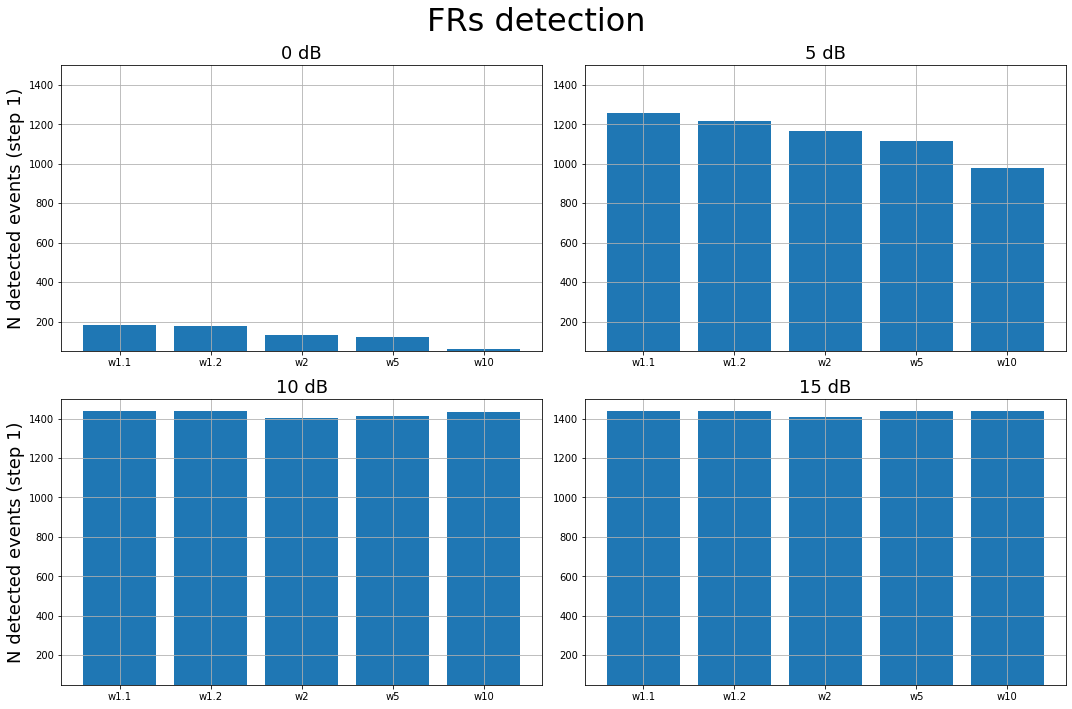

In [9]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,2, figsize=(15,10))

f.suptitle("FRs detection", fontsize = 32)

ax[0,0].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db0)
ax[0,0].set_title("0 dB", fontsize=18)
ax[0,0].grid()
ax[0,0].set_ylim(50,1500)
ax[0,0].set_ylabel("N detected events (step 1)", fontsize=18)
ax[0,1].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db5)
ax[0,1].set_title("5 dB", fontsize=18)
ax[0,1].grid()
ax[0,1].set_ylim(50,1500)
ax[1,0].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db10)
ax[1,0].set_title("10 dB", fontsize=18)
ax[1,0].grid()
ax[1,0].set_ylim(50,1500)
ax[1,0].set_ylabel("N detected events (step 1)", fontsize=18)
ax[1,1].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db15)
ax[1,1].set_title("15 dB", fontsize=18)
ax[1,1].grid()
ax[1,1].set_ylim(50,1500)

plt.tight_layout()

## 1.2. Plot sorted by w (noise weight in the model)

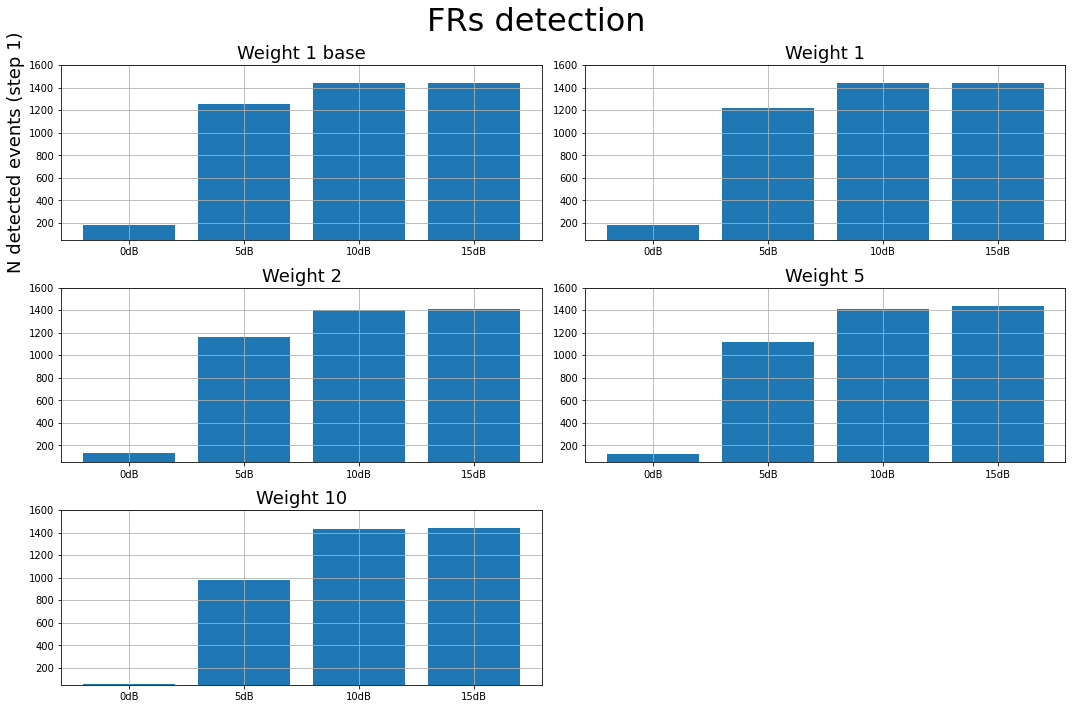

In [10]:
w_1_1 = []
w_1_2 = []
w_2 = []
w_5 = []
w_10 = []

w_1_1.append(step1_db0[0])
w_1_1.append(step1_db5[0])
w_1_1.append(step1_db10[0])
w_1_1.append(step1_db15[0])

w_1_2.append(step1_db0[1])
w_1_2.append(step1_db5[1])
w_1_2.append(step1_db10[1])
w_1_2.append(step1_db15[1])

w_2.append(step1_db0[2])
w_2.append(step1_db5[2])
w_2.append(step1_db10[2])
w_2.append(step1_db15[2])

w_5.append(step1_db0[3])
w_5.append(step1_db5[3])
w_5.append(step1_db10[3])
w_5.append(step1_db15[3])

w_10.append(step1_db0[4])
w_10.append(step1_db5[4])
w_10.append(step1_db10[4])
w_10.append(step1_db15[4])

f, ax = plt.subplots(3,2, figsize=(15,10))

f.suptitle("FRs detection", fontsize=32)

ax[0,0].bar(x=["0dB","5dB","10dB","15dB"],height=w_1_1)
ax[0,0].set_title("Weight 1 base", fontsize=18)
ax[0,0].grid()
ax[0,0].set_ylim(50,1600)
ax[0,0].set_ylabel("N detected events (step 1)", fontsize=18)
ax[0,1].bar(x=["0dB","5dB","10dB","15dB"],height=w_1_2)
ax[0,1].set_title("Weight 1", fontsize=18)
ax[0,1].grid()
ax[0,1].set_ylim(50,1600)
ax[1,0].bar(x=["0dB","5dB","10dB","15dB"],height=w_2)
ax[1,0].set_title("Weight 2", fontsize=18)
ax[1,0].grid()
ax[1,0].set_ylim(50,1600)
ax[1,1].bar(x=["0dB","5dB","10dB","15dB"],height=w_5)
ax[1,1].set_title("Weight 5", fontsize=18)
ax[1,1].grid()
ax[1,1].set_ylim(50,1600)
ax[2,0].bar(x=["0dB","5dB","10dB","15dB"],height=w_10)
ax[2,0].set_title("Weight 10", fontsize=18)
ax[2,0].grid()
ax[2,0].set_ylim(50,1600)
ax[2,1].axis('off')

plt.tight_layout()


# 2. Spikes

In [11]:
### Base model

import pandas as pd
import numpy as np

path_list = []

path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1base_detection_summary_20022023_17-17-22.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1_detection_summary_20022023_16-53-42.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-2_detection_summary_20022023_17-58-57.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-5_detection_summary_20022023_18-40-51.xlsx")
path_list.append(r"/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-10_detection_summary_20022023_18-55-01.xlsx")

step1_db0 = []
step1_db5 = []
step1_db10 = []
step1_db15 = []

for path in path_list:       
 
    print("")
    print(path)
    df = pd.read_excel(path)
    print(df.keys())
    print("")

    nb_pass_step1 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_step2 = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}
    nb_pass_both = {"0dB": 0, "5dB": 0, "10dB":0, "15dB":0}

    n_lines = df.shape[0]

    for i in range(n_lines):
        p_step1 = False
        p_step1 = False
        dB = df["chan_name"][i].split("-")[1].replace(' SNR ', '').replace('dB ', "dB")

        if df["pass_step1"][i]:
            p_step1 = True
            nb_pass_step1[dB]+=1

        if df["pass_step2"][i]:
            p_step2 = True
            nb_pass_step2[dB]+=1

        if p_step1 and p_step2:
            nb_pass_both[dB]+=1
            
    step1_db0.append(nb_pass_step1["0dB"])
    step1_db5.append(nb_pass_step1["5dB"])
    step1_db10.append(nb_pass_step1["10dB"])
    step1_db15.append(nb_pass_step1["15dB"])

    print("0dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['0dB']}")
    print(f"Pass step 2: {nb_pass_step2['0dB']}")
    print("")

    print("5dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['5dB']}")
    print(f"Pass step 2: {nb_pass_step2['5dB']}")
    print("")

    print("10dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['10dB']}")
    print(f"Pass step 2: {nb_pass_step2['10dB']}")
    print("")

    print("15dB")
    print("------")
    print(f"Pass step 1: {nb_pass_step1['15dB']}")
    print(f"Pass step 2: {nb_pass_step2['15dB']}")



/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1base_detection_summary_20022023_17-17-22.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 86
Pass step 2: 96

5dB
------
Pass step 1: 91
Pass step 2: 102

10dB
------
Pass step 1: 90
Pass step 2: 102

15dB
------
Pass step 1: 92
Pass step 2: 113

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-1_detection_summary_20022023_16-53-42.xlsx
Index(['JSON-index', 'JSON-ID', 'chan_name', 'event_time', 'pass_step1',
       'pass_step2'],
      dtype='object')

0dB
------
Pass step 1: 77
Pass step 2: 96

5dB
------
Pass step 1: 91
Pass step 2: 102

10dB
------
Pass step 1: 84
Pass step 2: 102

15dB
------
Pass step 1: 88
Pass step 2: 113

/Users/gardy/Documents/GardyL/Python/Halyzia_weight_effect/markers_spike/weight-2_detection_summary_20022023_17-58-57.xlsx
Index(['JSON-index', 'JSON-I

## 2.1. Plot sorted by dB

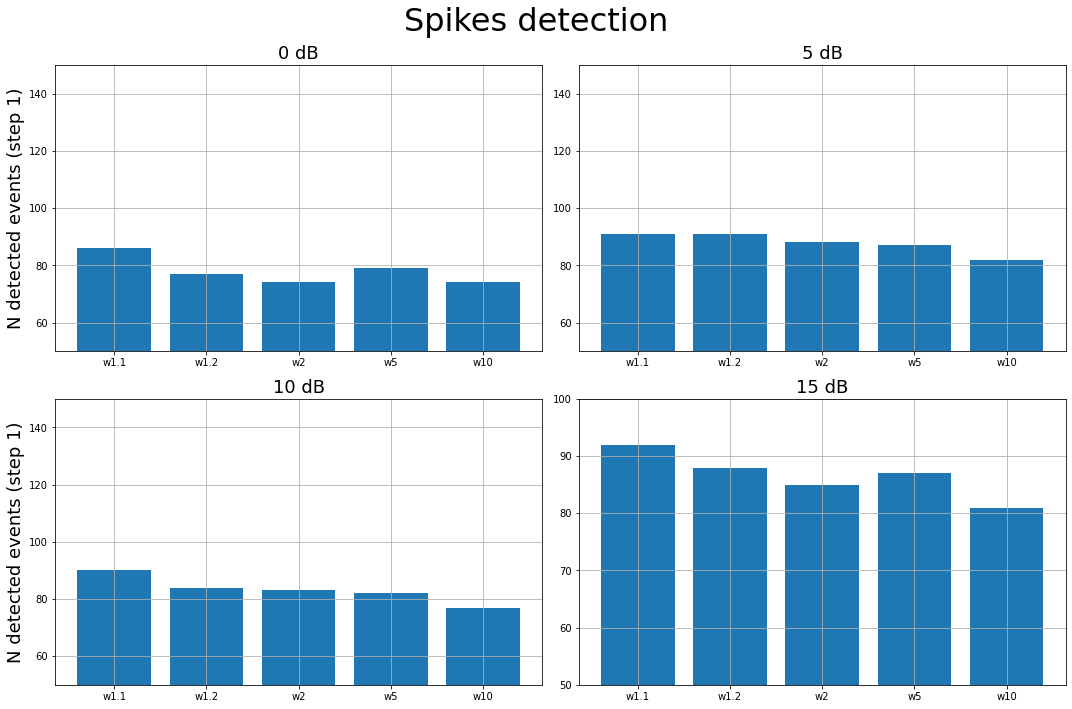

In [12]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,2, figsize=(15,10))

f.suptitle("Spikes detection", fontsize = 32)

ax[0,0].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db0)
ax[0,0].set_title("0 dB", fontsize=18)
ax[0,0].grid()
ax[0,0].set_ylim(50,150)
ax[0,0].set_ylabel("N detected events (step 1)", fontsize=18)
ax[0,1].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db5)
ax[0,1].set_title("5 dB", fontsize=18)
ax[0,1].grid()
ax[0,1].set_ylim(50,150)
ax[1,0].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db10)
ax[1,0].set_title("10 dB", fontsize=18)
ax[1,0].grid()
ax[1,0].set_ylim(50,150)
ax[1,0].set_ylabel("N detected events (step 1)", fontsize=18)
ax[1,1].bar(x=["w1.1","w1.2","w2","w5","w10"],height=step1_db15)
ax[1,1].set_title("15 dB", fontsize=18)
ax[1,1].grid()
ax[1,1].set_ylim(50,100)

plt.tight_layout()

## 2.2. Plot sorted by w (noise weight in the model)

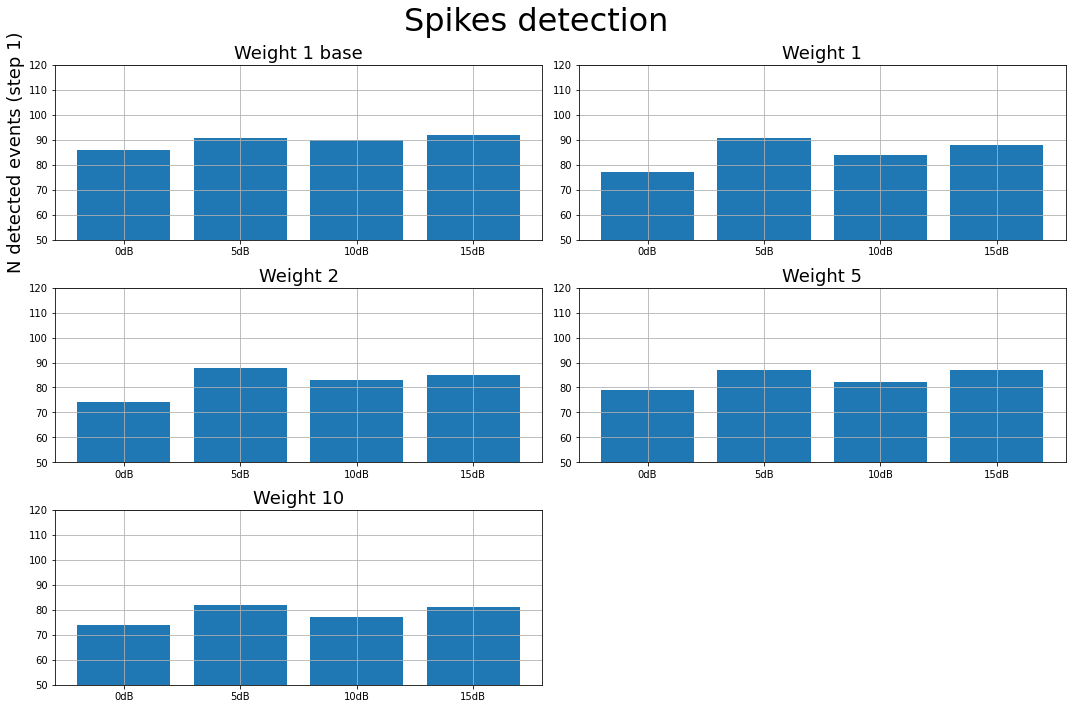

In [13]:
w_1_1 = []
w_1_2 = []
w_2 = []
w_5 = []
w_10 = []

w_1_1.append(step1_db0[0])
w_1_1.append(step1_db5[0])
w_1_1.append(step1_db10[0])
w_1_1.append(step1_db15[0])

w_1_2.append(step1_db0[1])
w_1_2.append(step1_db5[1])
w_1_2.append(step1_db10[1])
w_1_2.append(step1_db15[1])

w_2.append(step1_db0[2])
w_2.append(step1_db5[2])
w_2.append(step1_db10[2])
w_2.append(step1_db15[2])

w_5.append(step1_db0[3])
w_5.append(step1_db5[3])
w_5.append(step1_db10[3])
w_5.append(step1_db15[3])

w_10.append(step1_db0[4])
w_10.append(step1_db5[4])
w_10.append(step1_db10[4])
w_10.append(step1_db15[4])

f, ax = plt.subplots(3,2, figsize=(15,10))

f.suptitle("Spikes detection", fontsize=32)

ax[0,0].bar(x=["0dB","5dB","10dB","15dB"],height=w_1_1)
ax[0,0].set_title("Weight 1 base", fontsize=18)
ax[0,0].grid()
ax[0,0].set_ylim(50,120)
ax[0,0].set_ylabel("N detected events (step 1)", fontsize=18)
ax[0,1].bar(x=["0dB","5dB","10dB","15dB"],height=w_1_2)
ax[0,1].set_title("Weight 1", fontsize=18)
ax[0,1].grid()
ax[0,1].set_ylim(50,120)
ax[1,0].bar(x=["0dB","5dB","10dB","15dB"],height=w_2)
ax[1,0].set_title("Weight 2", fontsize=18)
ax[1,0].grid()
ax[1,0].set_ylim(50,120)
ax[1,1].bar(x=["0dB","5dB","10dB","15dB"],height=w_5)
ax[1,1].set_title("Weight 5", fontsize=18)
ax[1,1].grid()
ax[1,1].set_ylim(50,120)
ax[2,0].bar(x=["0dB","5dB","10dB","15dB"],height=w_10)
ax[2,0].set_title("Weight 10", fontsize=18)
ax[2,0].grid()
ax[2,0].set_ylim(50,120)
ax[2,1].axis('off')

plt.tight_layout()
